In [162]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn import datasets, cross_validation, metrics, neighbors
from matplotlib.colors import ListedColormap
from pandas import DataFrame
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [163]:
x = np.linspace(0, 25, 500)
error = [random.normal(0, 0.2) for i in range(500)]
y = [0.0 for i in range(500)]
for i in range(500):
    y[i] = 0.5*x[i] + 1 + error[i]

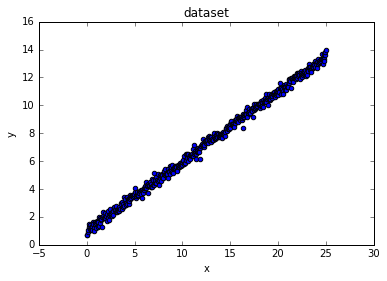

In [164]:
pyplot.scatter(x, y)
pyplot.xlabel("x")
pyplot.ylabel("y")
pyplot.title("dataset")

In [165]:
def MSE(params, y):
    return np.sum(np.array([(params[0] * x_ + params[1] - y_)**2 for x_, y_ in zip(x, y)]))

In [166]:
def MAE(params, y):
    return np.sum(np.array([np.abs(params[0] * x_ + params[1] - y_) for x_, y_ in zip(x, y)]))

In [167]:
res = optimize.minimize(MSE, (1, 1), args = y)

In [168]:
res

      fun: 21.376991691824287
 hess_inv: array([[  1.91233517e-05,  -2.39041904e-04],
       [ -2.39041904e-04,   3.98802399e-03]])
      jac: array([ -4.76837158e-07,  -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 4
     njev: 7
   status: 0
  success: True
        x: array([ 0.50016695,  0.9999232 ])

In [169]:
y_for_plot = [x[i] * res['x'][0] + res['x'][1] for i in range(500)]

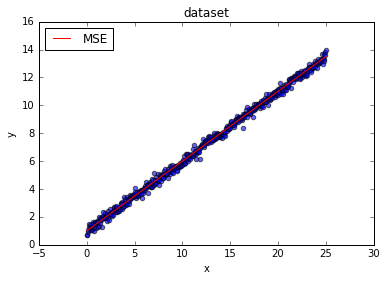

In [170]:
pyplot.scatter(x, y, alpha = 0.6)
pyplot.plot(x, y_for_plot, color = 'red', label = 'MSE')
pyplot.xlabel("x")
pyplot.ylabel("y")
pyplot.title("dataset")
axis = pyplot.gca()
axis.legend(loc = 2)

In [171]:
x_2 = np.linspace(0, 25, 75)
y_2 = [-1 + random.normal(0, 0.2) for i in range(75)]
x = list(x)

In [172]:
np.array(x.extend(list(x_2)))
y.extend(y_2)

In [173]:
res_mse = optimize.minimize(MSE, (1, 1), args = y)
res_mae = optimize.minimize(MAE, (1, 1), args = y)

In [174]:
res_mse

      fun: 5300.242766483314
 hess_inv: array([[  1.07617961e-06,  -1.34522688e-05],
       [ -1.34522688e-05,   1.03772523e-03]])
      jac: array([ 0.00024414,  0.        ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 53
      nit: 4
     njev: 13
   status: 2
  success: False
        x: array([ 0.43455803,  0.7450019 ])

In [179]:
res_mae

      fun: 697.3399400122021
 hess_inv: array([[  9.70592210e-06,  -1.24313494e-04],
       [ -1.24313494e-04,   1.71438864e-03]])
      jac: array([ 9.15797424,  0.71407318])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 184
      nit: 9
     njev: 43
   status: 2
  success: False
        x: array([ 0.50006899,  0.96377442])

In [176]:
y_for_plot_1 = [x[i] * res_mse['x'][0] + res_mse['x'][1] for i in range(575)]
y_for_plot_2 = [x[i] * res_mae['x'][0] + res_mae['x'][1] for i in range(575)]

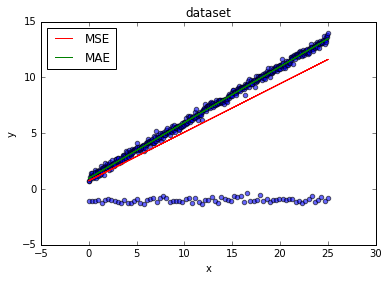

In [177]:
pyplot.scatter(x, y, alpha = 0.6)
pyplot.plot(x, y_for_plot_1, color = 'red', label = 'MSE')
pyplot.plot(x, y_for_plot_2, color = 'green', label = 'MAE')
pyplot.xlabel("x")
pyplot.ylabel("y")
pyplot.title("dataset")
axis = pyplot.gca()
axis.legend(loc = 2)

### На основе полученных графиков можно сделать вывод, что модель оптимизирующая MAE более устойчива к выбросам, чем MSE